# EDA on Wine Quality Data Analysis

## Disclosing the wine quality dataset

The wine quality dataset contains information about various physicochemical properties of wines. Each wine has a quality label associated with it. The label is in the range of 0 to 10.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import probplot

## Loading the dataset

In [5]:
df_raw = pd.read_csv("../data/winequalityN.csv")
df_raw.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

- *Type*: Type of wine. Red or white.
- *Fixed acidity*: Amount of tartaric acid in the wine. 
- *Volatile acidity*: Amount of acetic acid in the wine.
- *Citric acid*: Amount of citric acid in the wine.
- *Residual sugar*: Amount of sugar left in the wine after fermentation.
- *Chlorides*: Amount of salts in mineral acids.
- *Free sulfur dioxide*: Amount of $SO_2$ in free form.
- *Total sulfur dioxide*: Total amount of $SO_2$ in the wine. Works as an antioxidant and antimicrobial agent.
- *Density*: Density of the wine.
- *pH*: pH value of the wine. The range of value is between 0 (high acidity) to 14 (basic acidity).
- *Sulphates*: Amount of potassium sulphate in the wine.
- *Alcohol*: Alcohol content in the wine.
- *Quality*: Quality of wine. The range of value is between 1 (worst) to 10 (best).

## Descriptive statistics

In [10]:
df_raw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
df_raw.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [15]:
df_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Data wrangling

### Missing values

In [26]:
df_raw.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [28]:
df_raw = df_raw.interpolate()

In [29]:
df_raw.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Analyzing the data

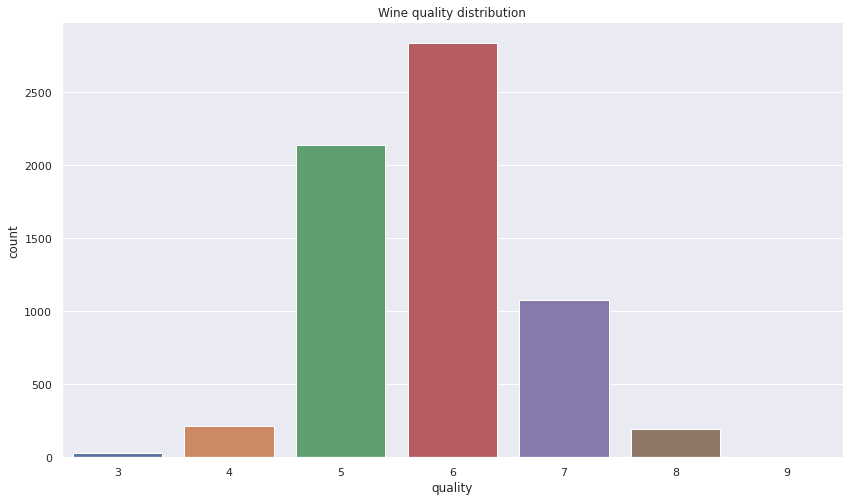

In [43]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.countplot(x='quality', data=df_raw).set(title='Wine quality distribution')
plt.show()

### Correlated columns

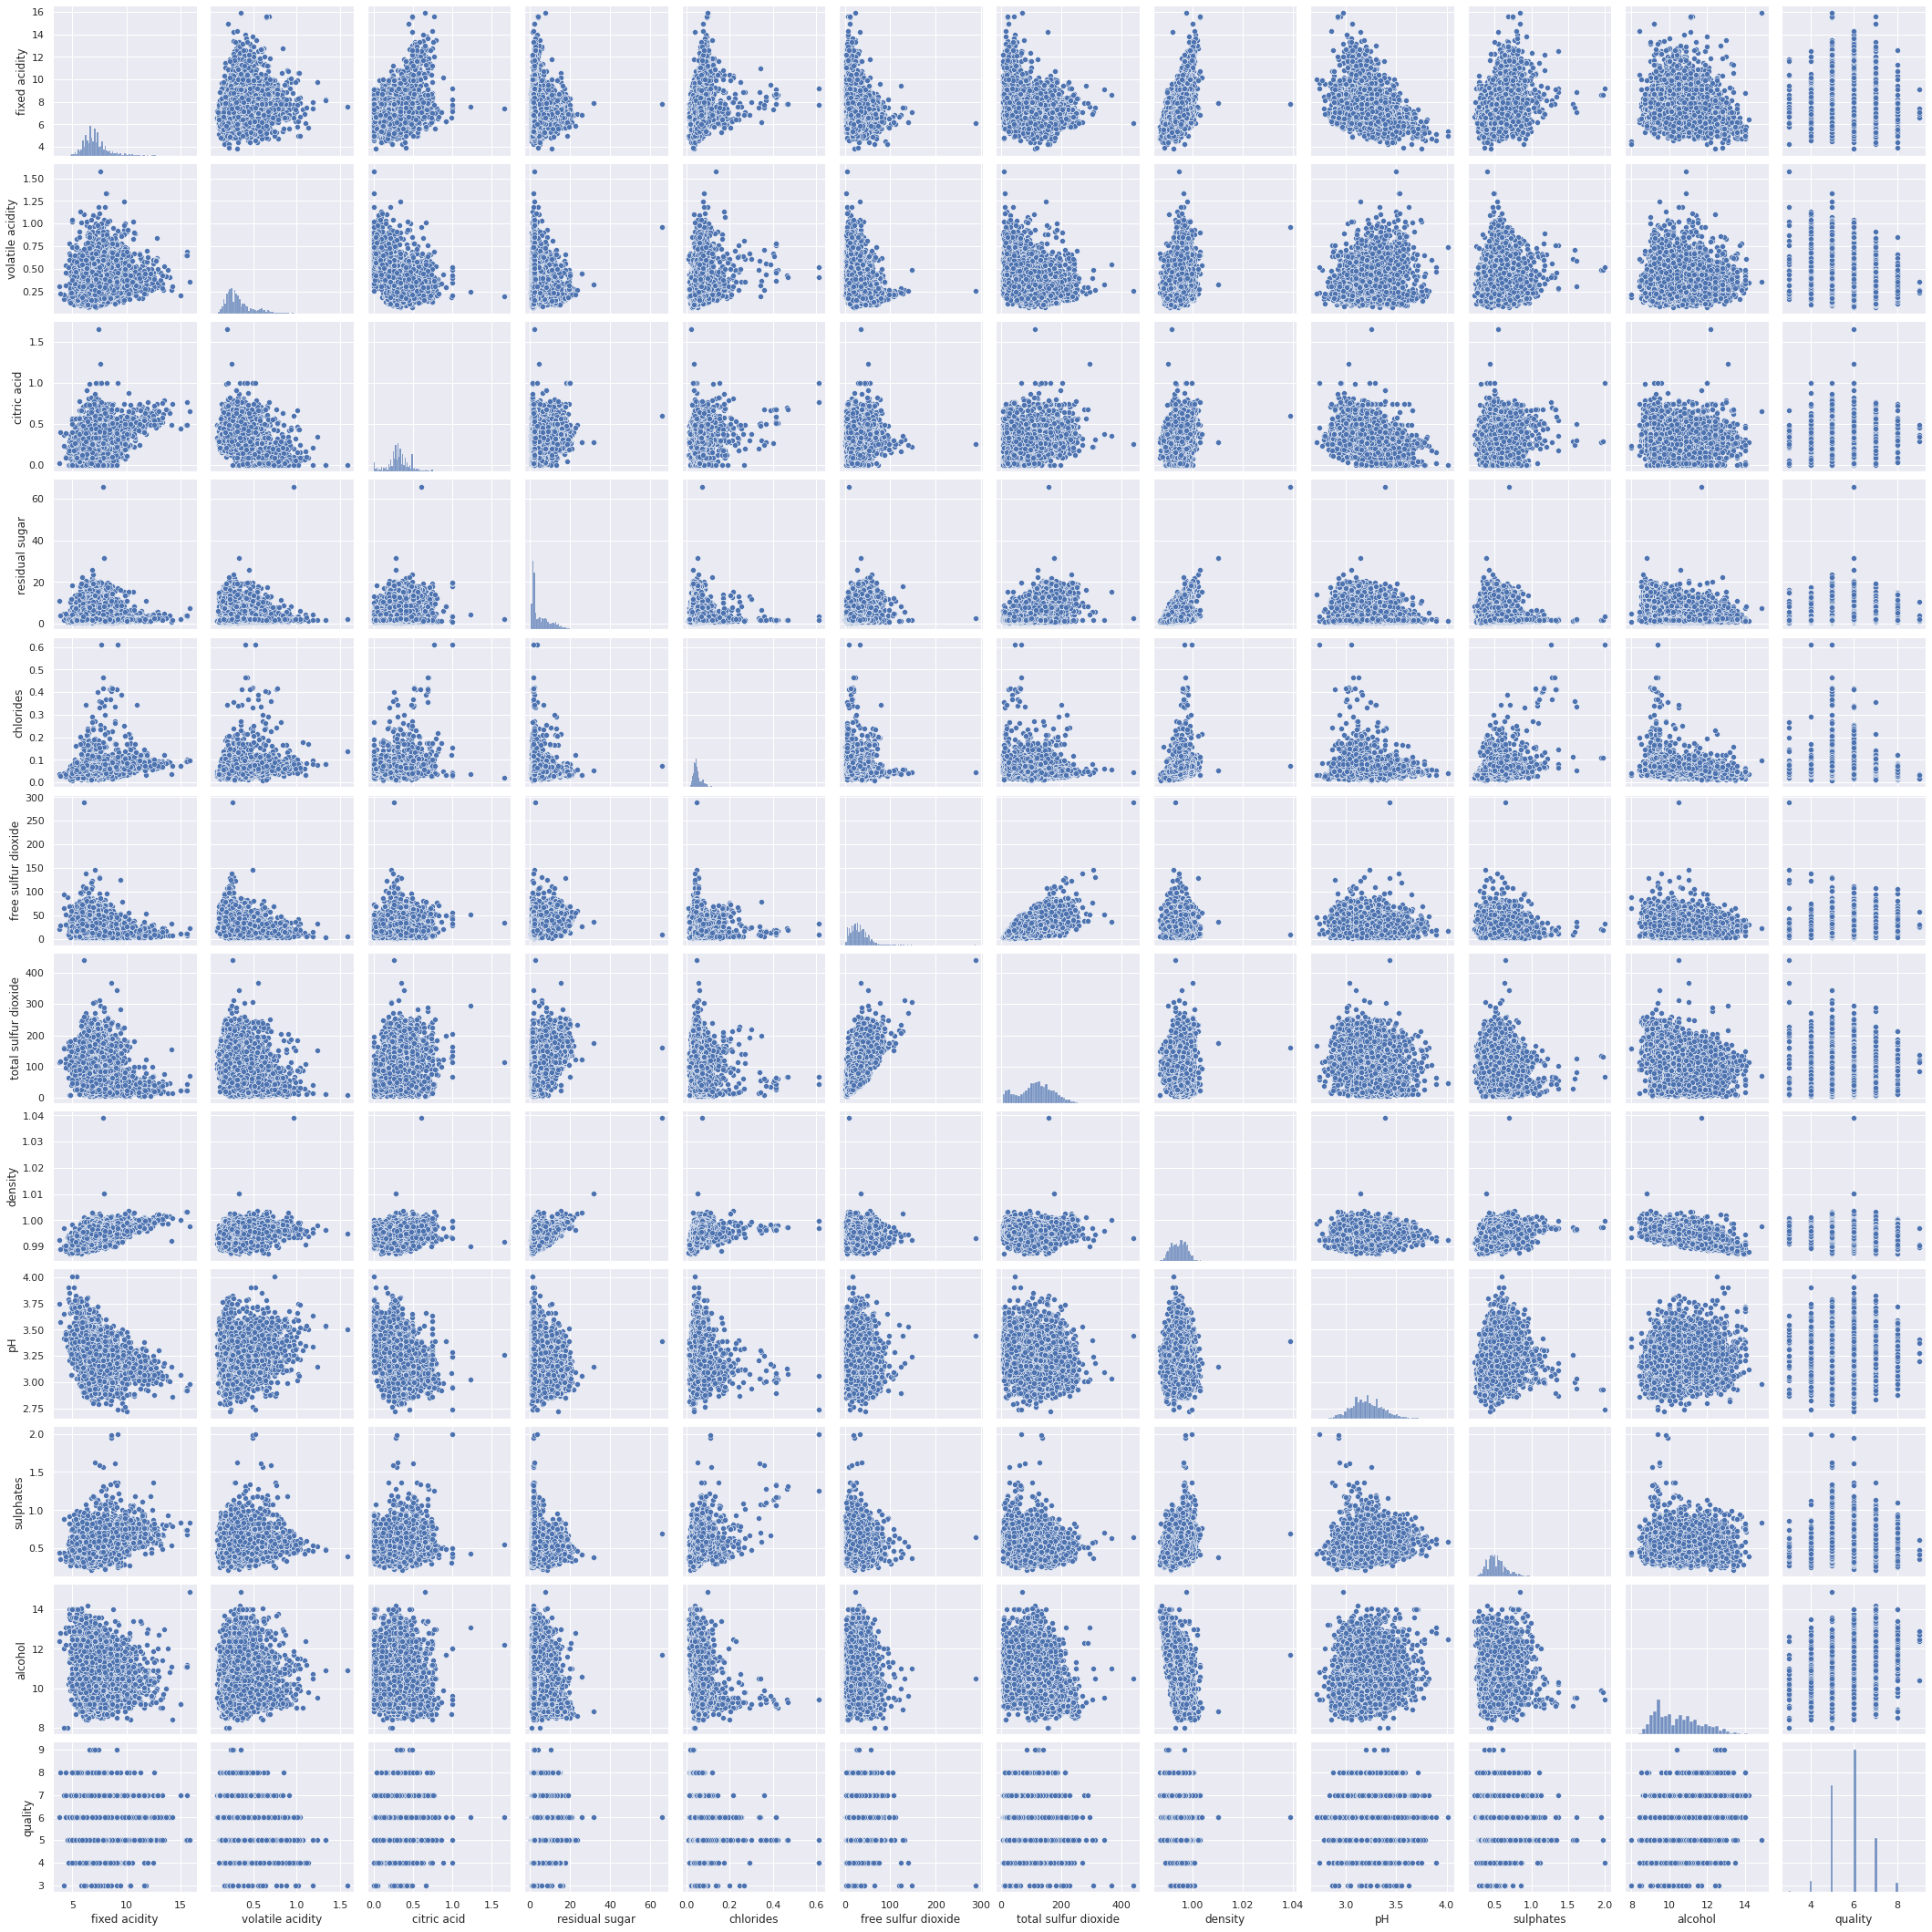

In [45]:
sns.pairplot(df_raw)
plt.show()

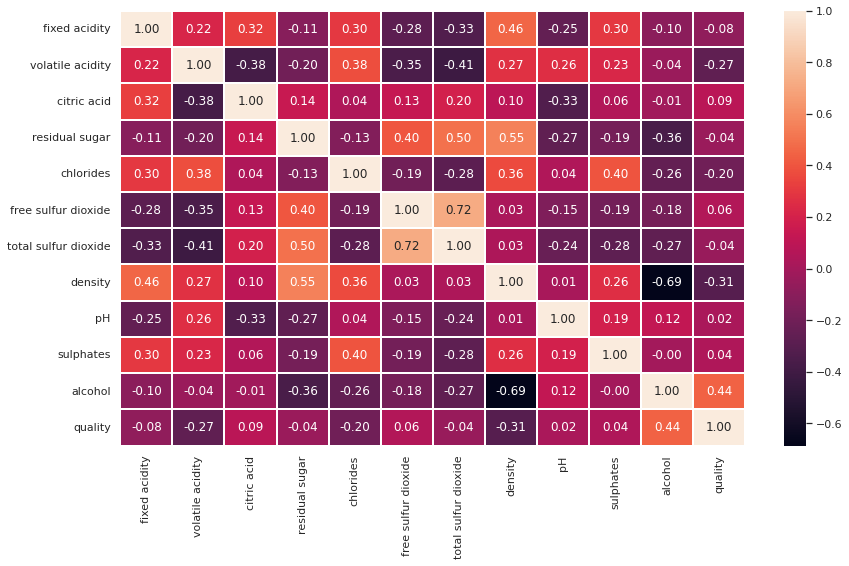

In [47]:
sns.heatmap(df_raw.corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

- Alcohol is positively correlated with the quality of the red wine.
- Alcohol has a weak positive correlation with the pH value.
- Citric acid and density have a strong positive correlation with fixed acidity.
- pH has a negative correlation with density, fixed acidity, citric acid, and sulfates.


In [80]:
def plot_feature_distribution(df : pd.DataFrame(), feature : str) -> None:
    f, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    sns.histplot(df[feature], kde=True, stat='density', linewidth=0, ax=ax[0]).set(title=f'{feature} distribution')
    
    #Probability plot
    probplot(df[feature], plot=ax[1])
    
    plt.show()
    print(f'{feature} skewness = {skew(df[feature])}')
    

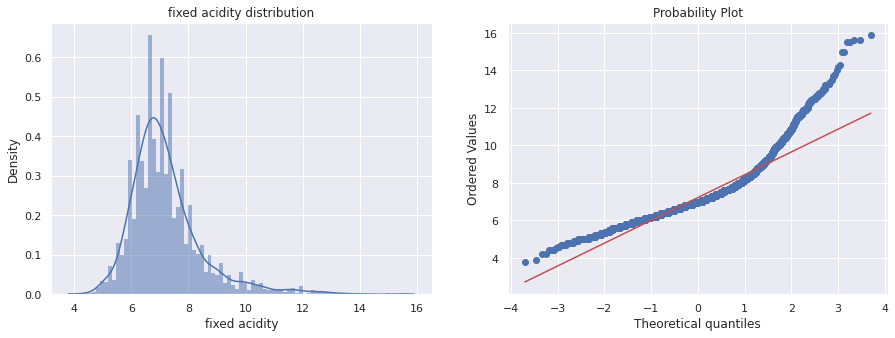

fixed acidity skewness = 1.7239327161904272


In [ ]:
numeric_features = df_raw.select_dtypes(include=np.number).columns.tolist()
for feature in numeric_features:
    plot_feature_distribution(df_raw, feature)